EECE 5644 Assignment 1

Question 1

Part A Q2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [3]:
m0 = np.array([-1, -1, -1, -1])
C0 = np.array([[2, -0.5, 0.3, 0],
               [-0.5, 1, -0.5, 0],
               [0.3, -0.5, 1, 0],
               [0, 0, 0, 2]])
m1 = np.array([1, 1, 1, 1])
C1 = np.array([[1, 0.3, -0.2, 0],
               [0.3, 2, 0.3, 0],
               [-0.2, 0.3, 1, 0],
               [0, 0, 0, 3]])
P_L0 = 0.35
P_L1 = 0.65
n_samples = 10000

In [4]:
np.random.seed(0)

samples_class_0 = np.random.multivariate_normal(m0, C0, int(P_L0 * n_samples))
samples_class_1 = np.random.multivariate_normal(m1, C1, int(P_L1 * n_samples))

X = np.vstack((samples_class_0, samples_class_1))
true_labels = np.hstack((np.zeros(int(P_L0 * n_samples)), np.ones(int(P_L1 * n_samples))))

In [5]:
p_x_given_L0 = multivariate_normal.pdf(X, mean=m0, cov=C0)
p_x_given_L1 = multivariate_normal.pdf(X, mean=m1, cov=C1)

In [6]:
likelihood_ratio = p_x_given_L1 / p_x_given_L0

In [7]:
gamma_values = np.concatenate(([0], np.logspace(-10, 10, 100))) 
TPR = []  
FPR = []  

for gamma in gamma_values:
    decisions = (likelihood_ratio > gamma).astype(int)

    tp = np.sum((decisions == 1) & (true_labels == 1))
    fn = np.sum((decisions == 0) & (true_labels == 1))
    fp = np.sum((decisions == 1) & (true_labels == 0))
    tn = np.sum((decisions == 0) & (true_labels == 0))

    TPR.append(tp / (tp + fn))
    FPR.append(fp / (fp + tn))

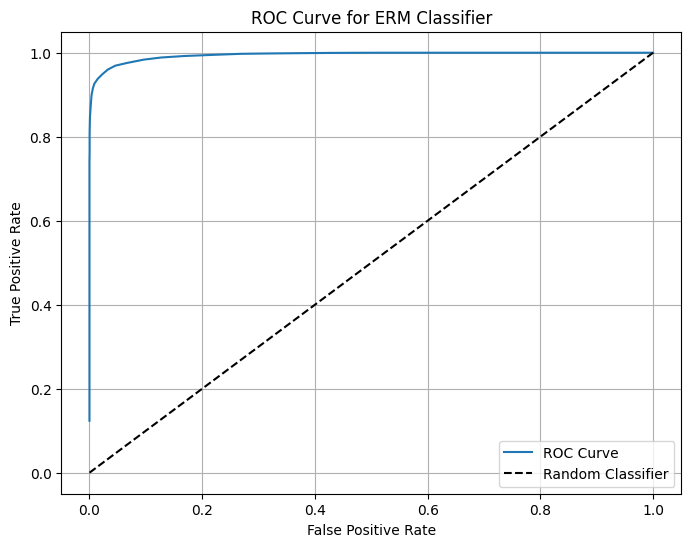

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(FPR, TPR, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.title('ROC Curve for ERM Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show() 